# Intel img, EDA and CNN prediction

- Data loading and image check
- Image data EDA, color distribution check
- CNN prediction
- Validation
- Consideration simulation filtering image with cv2

In [439]:
# File check
import os

In [440]:
dir_name = os.listdir("/kaggle/input/intel-image-classification/seg_test/seg_test/")
dir_name

['glacier', 'sea', 'forest', 'street', 'mountain', 'buildings']

In [441]:
# Basic library
import numpy as np 
import pandas as pd 

# Data preprocessing
import cv2 # Open cv
from sklearn.model_selection import train_test_split

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Machine learning library
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

# Validation
from sklearn.metrics import roc_auc_score

## Data loading

### File name dataframe

In [442]:
# Create empty dataframe and list
df = pd.DataFrame({})
lists = []
cate = []

# get the filenames
for dir_ in dir_name:
    # file name
    list_ = os.listdir("/kaggle/input/intel-image-classification/seg_test/seg_test/"+dir_+"/")
    lists = lists+list_
    # category name
    cate_ = np.tile(dir_,len(list_))
    cate = np.concatenate([cate,cate_])

# insert dataframe
df["cate"] = cate
df["name"] = lists

### Image datas

In [443]:
# Define data size
size = 128

In [444]:
# data loading
# Create image data list
img_data = []

# Data loading
for dir_ in dir_name:
    for name in df[df["cate"]==dir_]["name"]:
        path = "/kaggle/input/intel-image-classification/seg_test/seg_test/"+dir_+"/"+name+""
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Change to color array, BGR⇒RGB
        image = cv2.resize(img, (size,size), interpolation=cv2.INTER_AREA)
        img_data.append(image)

# Add to dataframe
df["img"] = img_data

### Data confirming

In [445]:
# datasize
print("data set size:{}".format(df.shape))

data set size:(3000, 3)


In [446]:
# Null check
print("Null data:{}".format(df.isnull().sum()))

Null data:cate    0
name    0
img     0
dtype: int64


In [447]:
# unique categorise
print("unique category:\n{}".format(df["cate"].value_counts()))

unique category:
glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
Name: cate, dtype: int64


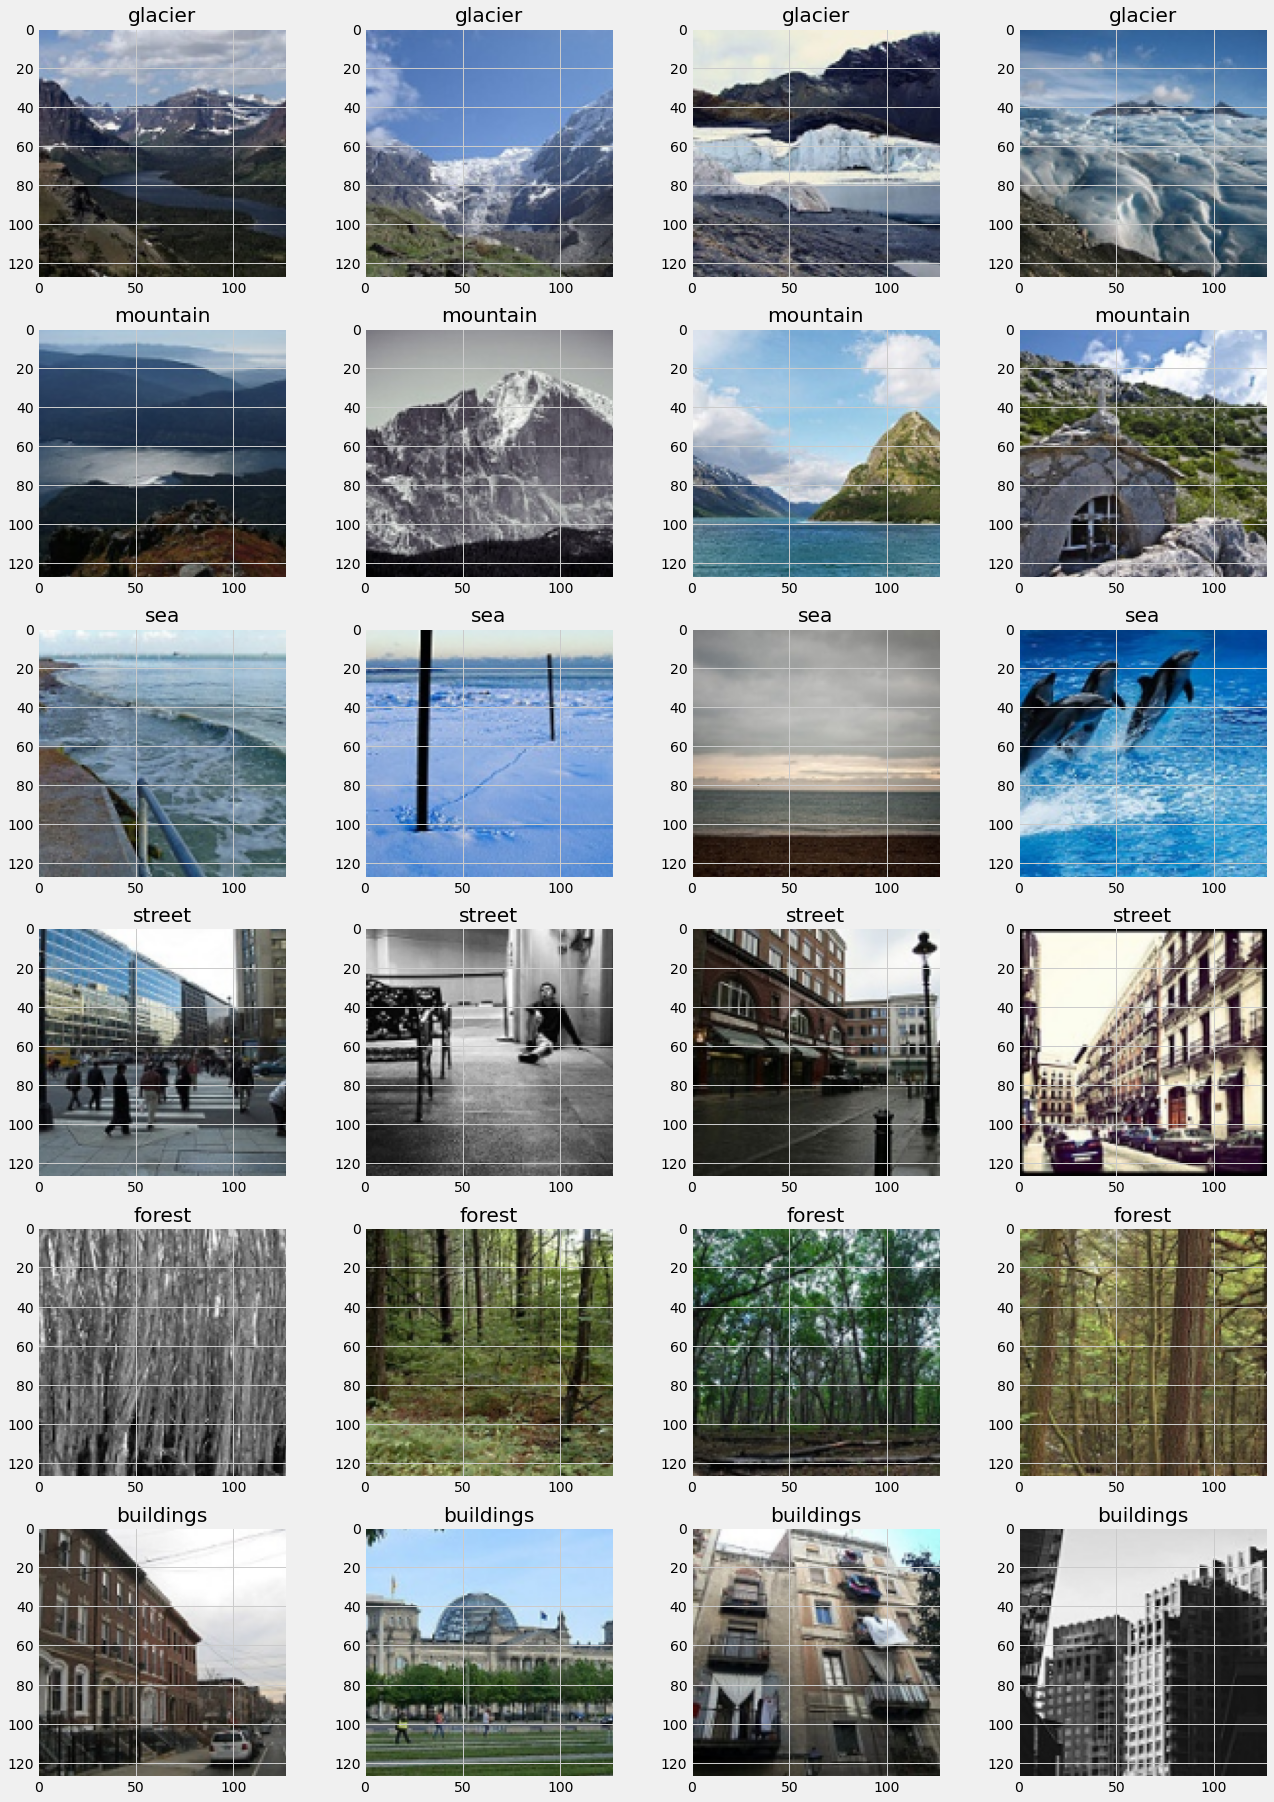

In [448]:
# image check
cate_name = df["cate"].value_counts().index

fig, ax = plt.subplots(6,4, figsize=(20,30))
for i in range(6):
    for j in range(4):
        ax[i,j].imshow(df[df["cate"]==cate_name[i]]["img"].values[j])
        ax[i,j].set_title(cate_name[i])

## Image data EDA

### Color distribution

Comparison each average and standard deviation RGB of image, with category.

In [449]:
# Create each category dataframe
gla_df = pd.DataFrame({})
mou_df = pd.DataFrame({})
sea_df = pd.DataFrame({})
str_df = pd.DataFrame({})
for_df = pd.DataFrame({})
bui_df = pd.DataFrame({})

In [450]:
# Define function
def create_rgb_df(sample_df):
    create_df = pd.DataFrame({})
    # Create each list
    red_mean = []
    red_std = []
    green_mean = []
    green_std = []
    blue_mean = []
    blue_std = []
    
    for i in range(len(sampling_df )):
        red_m = sampling_df["img"].values[i][:,:,0].mean()
        red_s = sampling_df["img"].values[i][:,:,0].std()
        green_m = sampling_df["img"].values[i][:,:,1].mean()
        green_s = sampling_df["img"].values[i][:,:,1].std()
        blue_m = sampling_df["img"].values[i][:,:,2].mean()
        blue_s = sampling_df["img"].values[i][:,:,2].std()
        # Append to list
        red_mean.append(red_m)
        red_std.append(red_s)
        green_mean.append(green_m)
        green_std.append(green_s)
        blue_mean.append(blue_m)
        blue_std.append(blue_s)

    create_df["red_mean"] = red_mean
    create_df["red_std"] = red_std
    create_df["green_mean"] = green_mean
    create_df["green_std"] = green_std
    create_df["blue_mean"] = blue_mean
    create_df["blue_std"] = blue_std
    
    return create_df

In [451]:
# Define sampling_df of glacier
sampling_df = df[df["cate"]=="glacier"]
gla_df = create_rgb_df(sampling_df)

# Define sampling_df of mountain
sampling_df = df[df["cate"]=="mountain"]
mou_df = create_rgb_df(sampling_df)

# Define sampling_df of sea
sampling_df = df[df["cate"]=="sea"]
sea_df = create_rgb_df(sampling_df)

# Define sampling_df of street
sampling_df = df[df["cate"]=="street"]
str_df = create_rgb_df(sampling_df)

# Define sampling_df of forest
sampling_df = df[df["cate"]=="forest"]
for_df = create_rgb_df(sampling_df)

# Define sampling_df of building
sampling_df = df[df["cate"]=="buildings"]
bui_df = create_rgb_df(sampling_df)

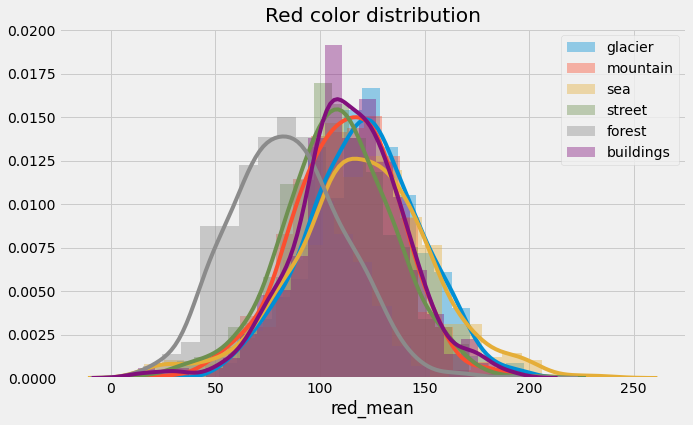

In [452]:
# Visualization of Red mean distribution
plt.figure(figsize=(10,6))
sns.distplot(gla_df["red_mean"], label="glacier")
sns.distplot(mou_df["red_mean"],label="mountain")
sns.distplot(sea_df["red_mean"], label="sea")
sns.distplot(str_df["red_mean"], label="street")
sns.distplot(for_df["red_mean"], label="forest")
sns.distplot(bui_df["red_mean"], label="buildings")
plt.title("Red color distribution")
plt.legend()

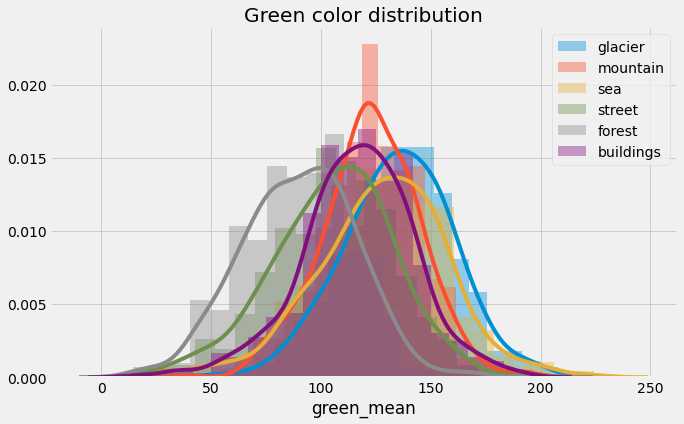

In [453]:
# Visualization of Green mean distribution
plt.figure(figsize=(10,6))
sns.distplot(gla_df["green_mean"], label="glacier")
sns.distplot(mou_df["green_mean"],label="mountain")
sns.distplot(sea_df["green_mean"], label="sea")
sns.distplot(str_df["green_mean"], label="street")
sns.distplot(for_df["green_mean"], label="forest")
sns.distplot(bui_df["green_mean"], label="buildings")
plt.title("Green color distribution")
plt.legend()

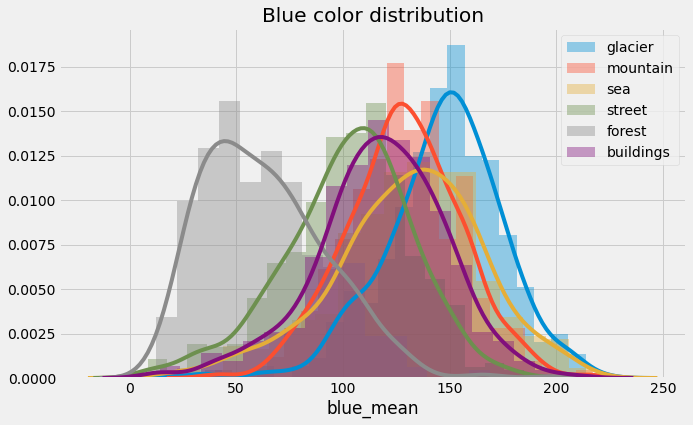

In [454]:
# Visualization of Blue mean distribution
plt.figure(figsize=(10,6))
sns.distplot(gla_df["blue_mean"], label="glacier")
sns.distplot(mou_df["blue_mean"],label="mountain")
sns.distplot(sea_df["blue_mean"], label="sea")
sns.distplot(str_df["blue_mean"], label="street")
sns.distplot(for_df["blue_mean"], label="forest")
sns.distplot(bui_df["blue_mean"], label="buildings")
plt.title("Blue color distribution")
plt.legend()

- Color distributions are different each categories. Color can have cateogorical information.
- For some colors, the differences between categories are small. For example, in red color, mountain and road, and in glaciers and sea have similar colors.

# CNN prediction

## Data [](http://)preporcessing

train, test data splitting

In [455]:
# create dummy variables
df = pd.concat([df,pd.get_dummies(df["cate"])], axis=1)
df.head()

cate       name                                                img  \
0  glacier  20109.jpg  [[[103, 139, 187], [105, 140, 188], [106, 140,...   
1  glacier  22927.jpg  [[[122, 139, 188], [117, 137, 185], [106, 130,...   
2  glacier  22379.jpg  [[[227, 234, 218], [229, 235, 219], [231, 235,...   
3  glacier  21043.jpg  [[[39, 83, 130], [40, 83, 130], [41, 83, 131],...   
4  glacier  21463.jpg  [[[98, 154, 189], [98, 154, 189], [98, 154, 18...   

   buildings  forest  glacier  mountain  sea  street  
0          0       0        1         0    0       0  
1          0       0        1         0    0       0  
2          0       0        1         0    0       0  
3          0       0        1         0    0       0  
4          0       0        1         0    0       0

In [456]:
# Define parameters
X = df["img"]
y = df[["buildings", "forest", "glacier", "mountain", "sea", "street"]]
category = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

# Separate the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_val, y_val = X_test.head(450), y_test.head(450)
X_test, y_test = X_test.tail(450), y_test.tail(450)

consid_index = X_test.index

In [457]:
# Image data
# Data shaping & Change to ndarray
X_train_array = np.ndarray(shape=(len(X_train),size,size,3), dtype=np.float32)
X_val_array = np.ndarray(shape=(len(X_val),size,size,3), dtype=np.float32)
X_test_array = np.ndarray(shape=(len(X_test),size,size,3), dtype=np.float32)

# Define function
def change_array(input_array, output_array):
    for i in range(len(input_array)):
        output_array[i] = input_array.values[i]
    return output_array

X_train_array = change_array(X_train, X_train_array)
X_val_array = change_array(X_val, X_val_array)
X_test_array = change_array(X_test, X_test_array)

# Scaling
X_train = X_train_array/255
X_val = X_val_array/255
X_test = X_test_array/255

# Checking dimension
print("train data shape:{}".format(X_train.shape))
print("train data shape:{}".format(X_val.shape))
print("test data shape:{}".format(X_test.shape))

train data shape:(2100, 128, 128, 3)
train data shape:(450, 128, 128, 3)
test data shape:(450, 128, 128, 3)


In [458]:
# Traget data
y_train1 = y_train["buildings"]
y_train2 = y_train["forest"]
y_train3 = y_train["glacier"]
y_train4 = y_train["mountain"]
y_train5 = y_train["sea"]
y_train6 = y_train["street"]

# Val data
y_val1 = y_val["buildings"]
y_val2 = y_val["forest"]
y_val3 = y_val["glacier"]
y_val4 = y_val["mountain"]
y_val5 = y_val["sea"]
y_val6 = y_val["street"]

# Test data
y_test1 = y_test["buildings"]
y_test2 = y_test["forest"]
y_test3 = y_test["glacier"]
y_test4 = y_test["mountain"]
y_test5 = y_test["sea"]
y_test6 = y_test["street"]

In [459]:
# Convert class vectors to binary class metrics
y_train1 = keras.utils.to_categorical(y_train1,2)
y_train2 = keras.utils.to_categorical(y_train2,2)
y_train3 = keras.utils.to_categorical(y_train3,2)
y_train4 = keras.utils.to_categorical(y_train4,2)
y_train5 = keras.utils.to_categorical(y_train5,2)
y_train6 = keras.utils.to_categorical(y_train6,2)

# Val data
y_val1 = keras.utils.to_categorical(y_val1,2)
y_val2 = keras.utils.to_categorical(y_val2,2)
y_val3 = keras.utils.to_categorical(y_val3,2)
y_val4 = keras.utils.to_categorical(y_val4,2)
y_val5 = keras.utils.to_categorical(y_val5,2)
y_val6 = keras.utils.to_categorical(y_val6,2)

# Test data
y_test1 = keras.utils.to_categorical(y_test1,2)
y_test2 = keras.utils.to_categorical(y_test2,2)
y_test3 = keras.utils.to_categorical(y_test3,2)
y_test4 = keras.utils.to_categorical(y_test4,2)
y_test5 = keras.utils.to_categorical(y_test5,2)
y_test6 = keras.utils.to_categorical(y_test6,2)

# shape check
print("y_train data shape:{}".format(y_train1.shape))
print("y_val data shape:{}".format(y_val1.shape))
print("y_test data shape:{}".format(y_test1.shape))

y_train data shape:(2100, 2)
y_val data shape:(450, 2)
y_test data shape:(450, 2)


## Difine CNN model

In [460]:
def define_model():
    # Model
    inputs = Input(shape=(size, size, 3))
    
    # 1st layer
    x = BatchNormalization()(inputs)
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    # 2nd layer
    x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    # 3rd layer
    x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    # Flatten
    x = Flatten()(x)
    
    # Dens layer
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation="relu")(x)
    
    output1 = Dense(2, activation="softmax", name='output1')(x)
    output2 = Dense(2, activation="softmax", name='output2')(x)
    output3 = Dense(2, activation="softmax", name='output3')(x)
    output4 = Dense(2, activation="softmax", name='output4')(x)
    output5 = Dense(2, activation="softmax", name='output5')(x)
    output6 = Dense(2, activation="softmax", name='output6')(x)
    
    multiModel = Model(inputs, [output1, output2, output3, output4, output5, output6])
    
    # initiate Adam optimizer
    opt = keras.optimizers.adam(lr=0.001, decay=0.00001)
    
    # Compile
    multiModel.compile(loss={"output1":"categorical_crossentropy",
                            "output2":"categorical_crossentropy",
                            "output3":"categorical_crossentropy",
                            "output4":"categorical_crossentropy",
                            "output5":"categorical_crossentropy",
                            "output6":"categorical_crossentropy"},
                      optimizer = opt,
                      metrics=["accuracy"])
    return multiModel

In [461]:
# Define early stoppint
es_cb = EarlyStopping(monitor="val_loss",
                     patience=10,
                     verbose=1)
cp_cb = ModelCheckpoint("cnn_model_01_h1",
                       monitor="val_loss",
                       verbose=1,
                       save_best_only=True)

# parameters
batch_size=10
epochs=100

# train model fitting
model_cnn = define_model()
histry = model_cnn.fit(X_train,
                  {"output1":y_train1,
                  "output2":y_train2,
                  "output3":y_train3,
                  "output4":y_train4,
                  "output5":y_train5,
                  "output6":y_train6},
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X_val,
                                   {"output1":y_val1,
                                   "output2":y_val2,
                                   "output3":y_val3,
                                   "output4":y_val4,
                                   "output5":y_val5,
                                   "output6":y_val6,
                                   }),
                   callbacks=[es_cb, cp_cb])

Train on 2100 samples, validate on 450 samples
Epoch 1/100
2100/2100 [==============================] - 29s 14ms/step - loss: 18.2579 - output1_loss: 2.3593 - output2_loss: 1.6761 - output3_loss: 4.7311 - output4_loss: 3.3502 - output5_loss: 3.2878 - output6_loss: 2.8534 - output1_accuracy: 0.7810 - output2_accuracy: 0.8386 - output3_accuracy: 0.7710 - output4_accuracy: 0.7405 - output5_accuracy: 0.7457 - output6_accuracy: 0.7776 - val_loss: 2.7327 - val_output1_loss: 0.3705 - val_output2_loss: 0.3203 - val_output3_loss: 0.5052 - val_output4_loss: 0.4482 - val_output5_loss: 0.6149 - val_output6_loss: 0.4735 - val_output1_accuracy: 0.8756 - val_output2_accuracy: 0.8422 - val_output3_accuracy: 0.8044 - val_output4_accuracy: 0.8422 - val_output5_accuracy: 0.6267 - val_output6_accuracy: 0.7867

Epoch 00001: val_loss improved from inf to 2.73269, saving model to cnn_model_01_h1
Epoch 2/100
2100/2100 [==============================] - 27s 13ms/step - loss: 2.5952 - output1_loss: 0.4448 - out


Epoch 00010: val_loss did not improve from 1.81013
Epoch 11/100
2100/2100 [==============================] - 26s 13ms/step - loss: 1.8441 - output1_loss: 0.2926 - output2_loss: 0.1812 - output3_loss: 0.3710 - output4_loss: 0.3233 - output5_loss: 0.3760 - output6_loss: 0.3001 - output1_accuracy: 0.8824 - output2_accuracy: 0.9333 - output3_accuracy: 0.8367 - output4_accuracy: 0.8648 - output5_accuracy: 0.8205 - output6_accuracy: 0.8714 - val_loss: 1.6838 - val_output1_loss: 0.2449 - val_output2_loss: 0.1278 - val_output3_loss: 0.3726 - val_output4_loss: 0.3164 - val_output5_loss: 0.3665 - val_output6_loss: 0.2555 - val_output1_accuracy: 0.9067 - val_output2_accuracy: 0.9578 - val_output3_accuracy: 0.8089 - val_output4_accuracy: 0.8644 - val_output5_accuracy: 0.8244 - val_output6_accuracy: 0.8689

Epoch 00011: val_loss improved from 1.81013 to 1.68377, saving model to cnn_model_01_h1
Epoch 12/100
2100/2100 [==============================] - 26s 12ms/step - loss: 1.8178 - output1_loss: 0.


Epoch 00020: val_loss did not improve from 1.52679
Epoch 21/100
2100/2100 [==============================] - 26s 12ms/step - loss: 1.4311 - output1_loss: 0.2167 - output2_loss: 0.1062 - output3_loss: 0.2909 - output4_loss: 0.2829 - output5_loss: 0.3180 - output6_loss: 0.2164 - output1_accuracy: 0.9100 - output2_accuracy: 0.9605 - output3_accuracy: 0.8771 - output4_accuracy: 0.8819 - output5_accuracy: 0.8543 - output6_accuracy: 0.9124 - val_loss: 1.4295 - val_output1_loss: 0.1851 - val_output2_loss: 0.1154 - val_output3_loss: 0.3155 - val_output4_loss: 0.2922 - val_output5_loss: 0.3321 - val_output6_loss: 0.1890 - val_output1_accuracy: 0.9156 - val_output2_accuracy: 0.9622 - val_output3_accuracy: 0.8467 - val_output4_accuracy: 0.8733 - val_output5_accuracy: 0.8244 - val_output6_accuracy: 0.9178

Epoch 00021: val_loss improved from 1.52679 to 1.42947, saving model to cnn_model_01_h1
Epoch 22/100
2100/2100 [==============================] - 26s 12ms/step - loss: 1.3750 - output1_loss: 0.

2100/2100 [==============================] - 26s 12ms/step - loss: 1.0600 - output1_loss: 0.1289 - output2_loss: 0.0632 - output3_loss: 0.2224 - output4_loss: 0.2415 - output5_loss: 0.2504 - output6_loss: 0.1536 - output1_accuracy: 0.9414 - output2_accuracy: 0.9795 - output3_accuracy: 0.9129 - output4_accuracy: 0.8995 - output5_accuracy: 0.8852 - output6_accuracy: 0.9376 - val_loss: 1.4928 - val_output1_loss: 0.2397 - val_output2_loss: 0.1418 - val_output3_loss: 0.2929 - val_output4_loss: 0.2832 - val_output5_loss: 0.3383 - val_output6_loss: 0.1970 - val_output1_accuracy: 0.9267 - val_output2_accuracy: 0.9556 - val_output3_accuracy: 0.8667 - val_output4_accuracy: 0.8756 - val_output5_accuracy: 0.8667 - val_output6_accuracy: 0.9289

Epoch 00031: val_loss did not improve from 1.40701
Epoch 32/100
2100/2100 [==============================] - 26s 12ms/step - loss: 0.9857 - output1_loss: 0.1270 - output2_loss: 0.0567 - output3_loss: 0.2146 - output4_loss: 0.2324 - output5_loss: 0.2262 - out

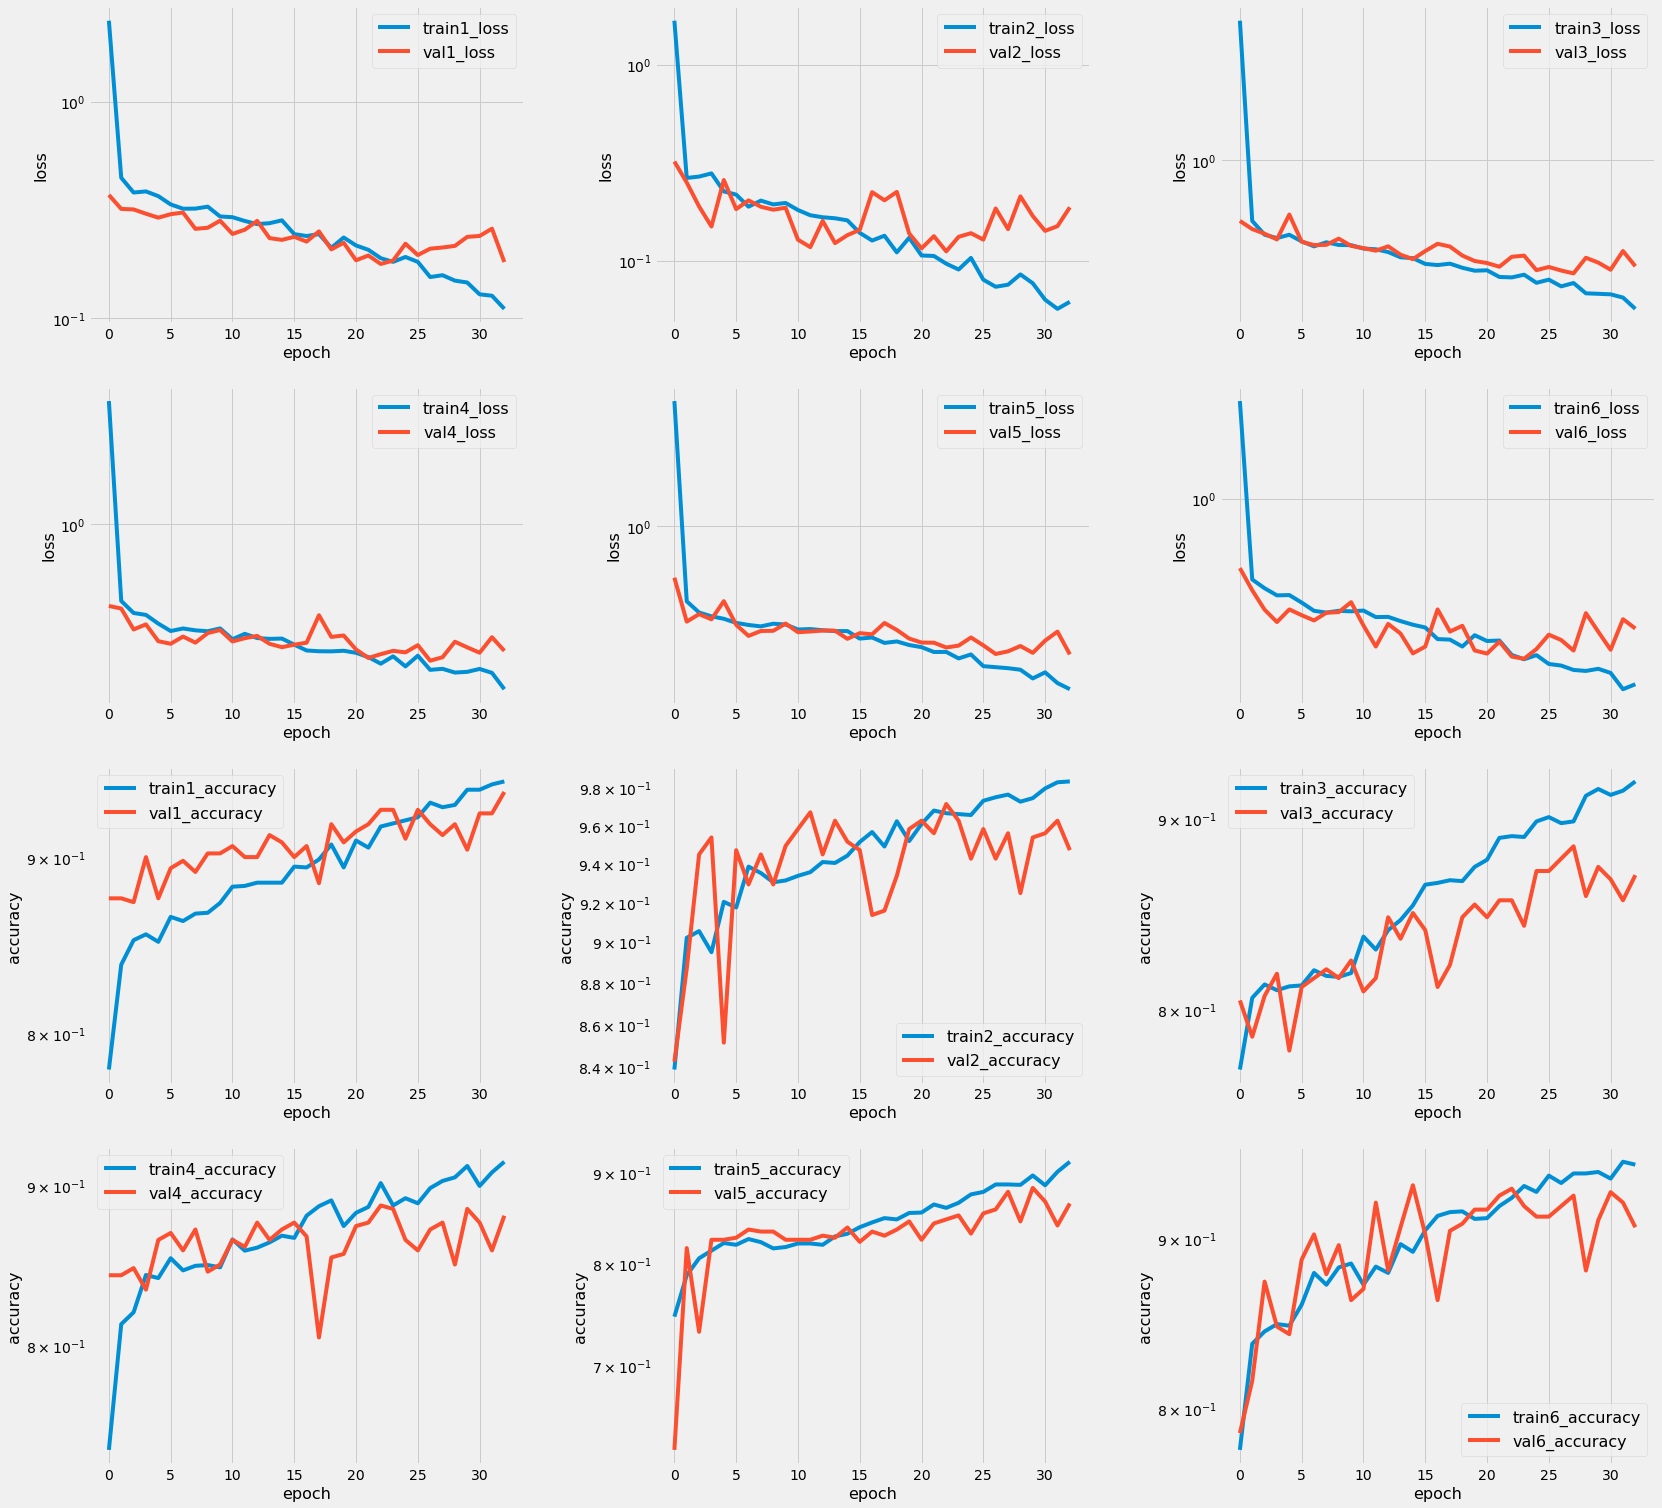

In [462]:
# train_loss
train1_loss = histry.history["output1_loss"]
train2_loss = histry.history["output2_loss"]
train3_loss = histry.history["output3_loss"]
train4_loss = histry.history["output4_loss"]
train5_loss = histry.history["output5_loss"]
train6_loss = histry.history["output6_loss"]

# val_loss
val1_loss = histry.history["val_output1_loss"]
val2_loss = histry.history["val_output2_loss"]
val3_loss = histry.history["val_output3_loss"]
val4_loss = histry.history["val_output4_loss"]
val5_loss = histry.history["val_output5_loss"]
val6_loss = histry.history["val_output6_loss"]


# train_accuracy
train1_acc = histry.history["output1_accuracy"]
train2_acc = histry.history["output2_accuracy"]
train3_acc = histry.history["output3_accuracy"]
train4_acc = histry.history["output4_accuracy"]
train5_acc = histry.history["output5_accuracy"]
train6_acc = histry.history["output6_accuracy"]


# val_accuracy
val1_acc = histry.history["val_output1_accuracy"]
val2_acc = histry.history["val_output2_accuracy"]
val3_acc = histry.history["val_output3_accuracy"]
val4_acc = histry.history["val_output4_accuracy"]
val5_acc = histry.history["val_output5_accuracy"]
val6_acc = histry.history["val_output6_accuracy"]


# Visualization
fig, ax = plt.subplots(4,3,figsize=(25,25))
plt.subplots_adjust(wspace=0.3)

# train1 loss
ax[0,0].plot(range(len(train1_loss)), train1_loss, label='train1_loss')
ax[0,0].plot(range(len(val1_loss)), val1_loss, label='val1_loss')
ax[0,0].set_xlabel('epoch', fontsize=16)
ax[0,0].set_ylabel('loss', fontsize=16)
ax[0,0].set_yscale('log')
ax[0,0].legend(fontsize=16)

# train2 loss
ax[0,1].plot(range(len(train2_loss)), train2_loss, label='train2_loss')
ax[0,1].plot(range(len(val2_loss)), val2_loss, label='val2_loss')
ax[0,1].set_xlabel('epoch', fontsize=16)
ax[0,1].set_ylabel('loss', fontsize=16)
ax[0,1].set_yscale('log')
ax[0,1].legend(fontsize=16)

# train3 loss
ax[0,2].plot(range(len(train3_loss)), train3_loss, label='train3_loss')
ax[0,2].plot(range(len(val3_loss)), val3_loss, label='val3_loss')
ax[0,2].set_xlabel('epoch', fontsize=16)
ax[0,2].set_ylabel('loss', fontsize=16)
ax[0,2].set_yscale('log')
ax[0,2].legend(fontsize=16)

# train4 loss
ax[1,0].plot(range(len(train4_loss)), train4_loss, label='train4_loss')
ax[1,0].plot(range(len(val4_loss)), val4_loss, label='val4_loss')
ax[1,0].set_xlabel('epoch', fontsize=16)
ax[1,0].set_ylabel('loss', fontsize=16)
ax[1,0].set_yscale('log')
ax[1,0].legend(fontsize=16)

# train5 loss
ax[1,1].plot(range(len(train5_loss)), train5_loss, label='train5_loss')
ax[1,1].plot(range(len(val5_loss)), val5_loss, label='val5_loss')
ax[1,1].set_xlabel('epoch', fontsize=16)
ax[1,1].set_ylabel('loss', fontsize=16)
ax[1,1].set_yscale('log')
ax[1,1].legend(fontsize=16)

# train6 loss
ax[1,2].plot(range(len(train6_loss)), train6_loss, label='train6_loss')
ax[1,2].plot(range(len(val6_loss)), val6_loss, label='val6_loss')
ax[1,2].set_xlabel('epoch', fontsize=16)
ax[1,2].set_ylabel('loss', fontsize=16)
ax[1,2].set_yscale('log')
ax[1,2].legend(fontsize=16)



# train1 accuracy
ax[2,0].plot(range(len(train1_acc)), train1_acc, label='train1_accuracy')
ax[2,0].plot(range(len(val1_acc)), val1_acc, label='val1_accuracy')
ax[2,0].set_xlabel('epoch', fontsize=16)
ax[2,0].set_ylabel('accuracy', fontsize=16)
ax[2,0].set_yscale('log')
ax[2,0].legend(fontsize=16)

# train2 accuracy
ax[2,1].plot(range(len(train2_acc)), train2_acc, label='train2_accuracy')
ax[2,1].plot(range(len(val2_acc)), val2_acc, label='val2_accuracy')
ax[2,1].set_xlabel('epoch', fontsize=16)
ax[2,1].set_ylabel('accuracy', fontsize=16)
ax[2,1].set_yscale('log')
ax[2,1].legend(fontsize=16)

# train3 accuracy
ax[2,2].plot(range(len(train3_acc)), train3_acc, label='train3_accuracy')
ax[2,2].plot(range(len(val3_acc)), val3_acc, label='val3_accuracy')
ax[2,2].set_xlabel('epoch', fontsize=16)
ax[2,2].set_ylabel('accuracy', fontsize=16)
ax[2,2].set_yscale('log')
ax[2,2].legend(fontsize=16)

# train4 accuracy
ax[3,0].plot(range(len(train4_acc)), train4_acc, label='train4_accuracy')
ax[3,0].plot(range(len(val4_acc)), val4_acc, label='val4_accuracy')
ax[3,0].set_xlabel('epoch', fontsize=16)
ax[3,0].set_ylabel('accuracy', fontsize=16)
ax[3,0].set_yscale('log')
ax[3,0].legend(fontsize=16)

# train5 accuracy
ax[3,1].plot(range(len(train5_acc)), train5_acc, label='train5_accuracy')
ax[3,1].plot(range(len(val5_acc)), val5_acc, label='val5_accuracy')
ax[3,1].set_xlabel('epoch', fontsize=16)
ax[3,1].set_ylabel('accuracy', fontsize=16)
ax[3,1].set_yscale('log')
ax[3,1].legend(fontsize=16)

# train6 accuracy
ax[3,2].plot(range(len(train6_acc)), train6_acc, label='train6_accuracy')
ax[3,2].plot(range(len(val6_acc)), val6_acc, label='val6_accuracy')
ax[3,2].set_xlabel('epoch', fontsize=16)
ax[3,2].set_ylabel('accuracy', fontsize=16)
ax[3,2].set_yscale('log')
ax[3,2].legend(fontsize=16)

In [463]:
# with val data, confirming confusion matrix
y_pred_cnn = load_model("cnn_model_01_h1").predict(X_test)

In [464]:
# Result of predicted dataframe
cnn_pred = pd.DataFrame({category[0]:[i[1] for i in y_pred_cnn[0]],
                         category[1]:[i[1] for i in y_pred_cnn[1]],
                         category[2]:[i[1] for i in y_pred_cnn[2]],
                         category[3]:[i[1] for i in y_pred_cnn[3]],
                         category[4]:[i[1] for i in y_pred_cnn[4]],
                         category[5]:[i[1] for i in y_pred_cnn[5]]})

# change to float to flag from max value.
def flag_df(df):
    for i in range(df.shape[0]):
        max_ = df.iloc[i,:].max()
        for j in range(df.shape[1]):
            max_ = df.iloc[i,j].max()

cnn_pred.head(10)

buildings    forest   glacier  mountain       sea    street
0   0.004427  0.002680  0.035802  0.816475  0.118758  0.010238
1   0.003975  0.001840  0.537827  0.130395  0.448059  0.006875
2   0.000531  0.000682  0.028300  0.505200  0.561329  0.003336
3   0.012686  0.947584  0.035538  0.003990  0.013825  0.015021
4   0.003620  0.003651  0.153471  0.438334  0.462565  0.020319
5   0.845941  0.004545  0.001220  0.002810  0.004642  0.175990
6   0.431589  0.029873  0.063330  0.029711  0.079480  0.438524
7   0.119151  0.068758  0.210329  0.134546  0.415063  0.303868
8   0.097433  0.028173  0.039195  0.011419  0.012733  0.753250
9   0.001082  0.001271  0.097231  0.204763  0.775784  0.003602

## Validation

In [465]:
# print roc_auc score
print("roc_auc score:{}".format(roc_auc_score(y_true=y_test, y_score=cnn_pred, average="weighted").round(3)))

roc_auc score:0.918


- roc_auc_score is 0.918, it turns out that it can be predicted with high numbers.

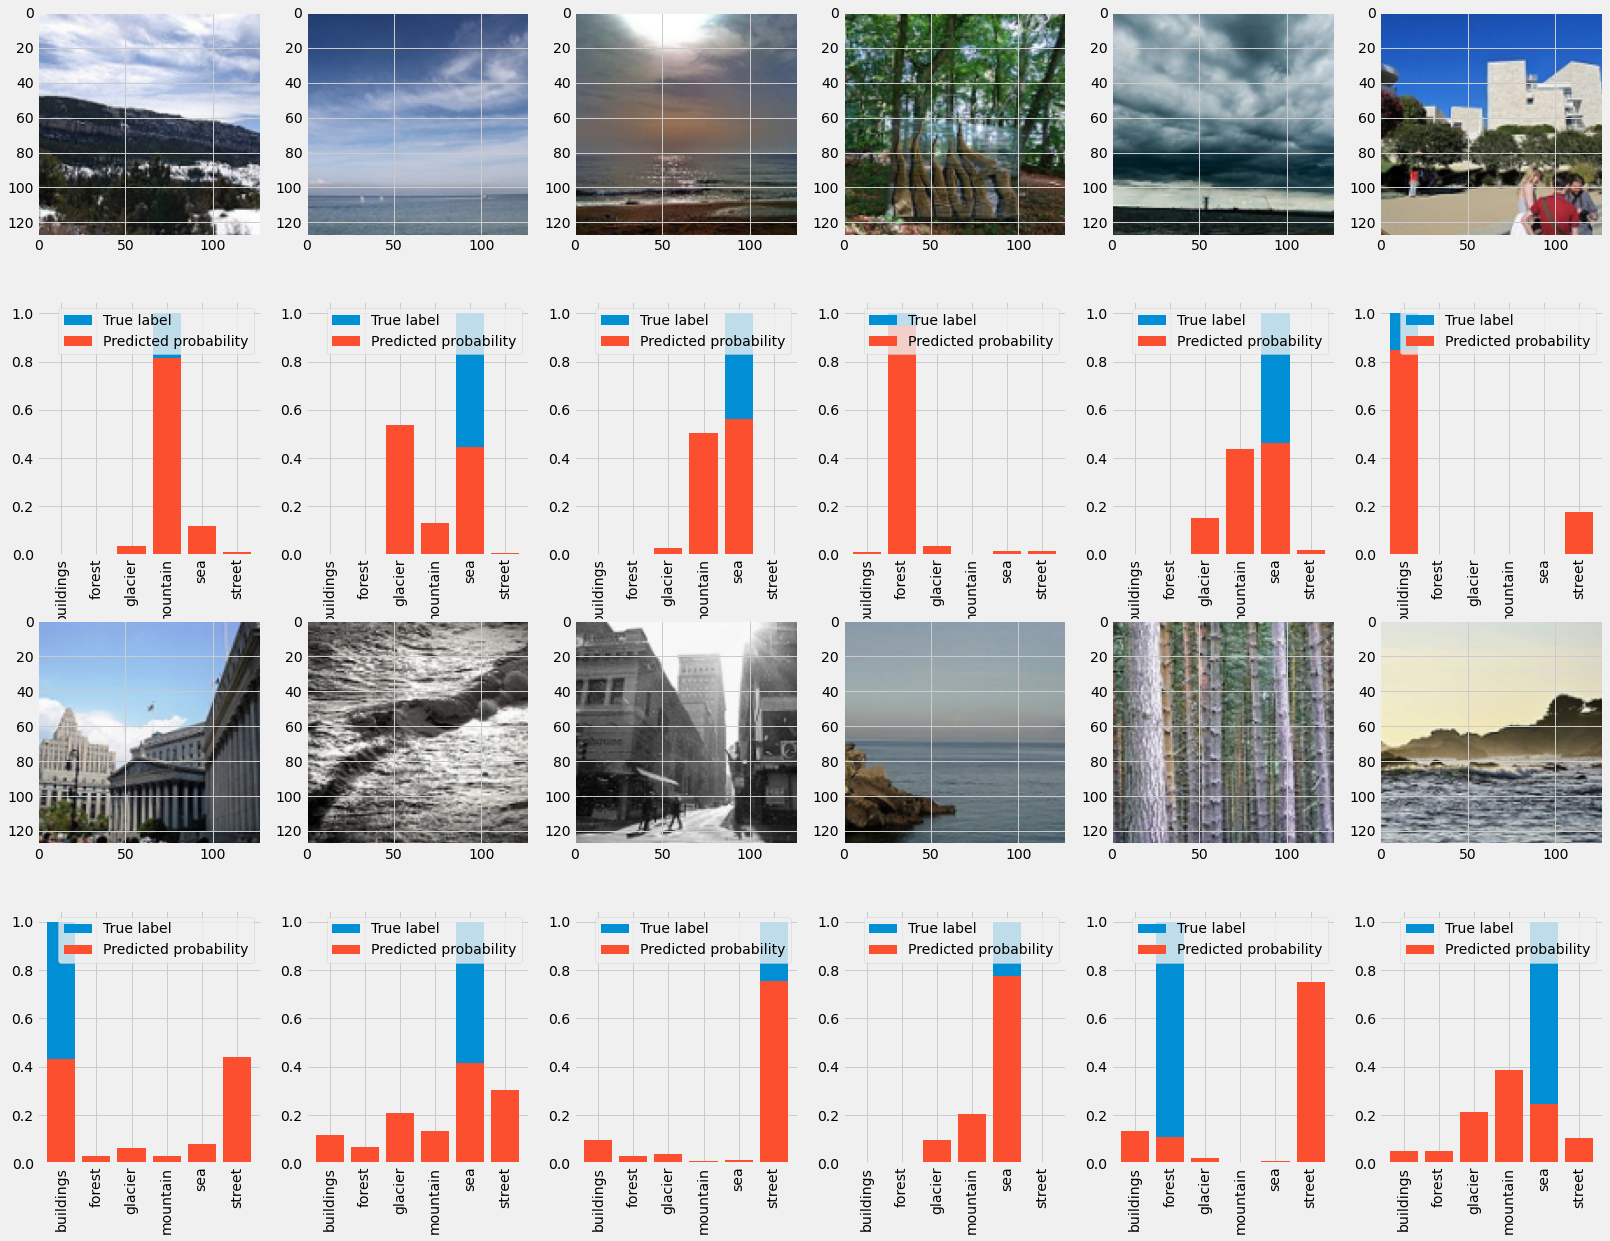

In [466]:
fig, ax = plt.subplots(4,6, figsize=(25,20))

for i in range(12):
    if i < 6:
        ax[0,i].imshow(X_test[i])
        ax[1,i].bar(category, y_test.iloc[i,:], label="True label")
        ax[1,i].bar(category, cnn_pred.iloc[i,:], label="Predicted probability")
        ax[1,i].xaxis.set_tick_params(rotation=90)
        ax[1,i].legend()
    else:
        ax[2,i-6].imshow(X_test[i])
        ax[3,i-6].bar(category, y_test.iloc[i,:], label="True label")
        ax[3,i-6].bar(category, cnn_pred.iloc[i,:], label="Predicted probability")
        ax[3,i-6].xaxis.set_tick_params(rotation=90)
        ax[3,i-6].legend()

- Even if you look at the individual photos, you can distinguish between those that are well predicted and those that are not, but the characteristic shape is captured.
- Looking at things that could not be done, for example, the example of predicting the sky and sea figure as a glacier may have missed the prediction because there are no characteristic lines and the colors are close.
In addition, 
- In the example where a road is called a building, there is a building in the photo, and people can make a mistake when thinking about it.
- The prediction result is not clear in the example of a tree photograph. Probably the straight line got lost on the road or building.

## Consideration simulation filtering image with cv2

In [474]:
# Cinfirming the test data index
print("Sea and sky image:{}".format(consid_index[2]))
print("Street image:{}".format(consid_index[8]))
print("forest image:{}".format(consid_index[11]))

Sea and sky image:609
Street image:1824
forest image:695


## Convlution
In order to confirm the filtering state in the convolutional layer, I made an image by simulating with cv2. <br>
Looking at the results, it is difficult to predict the sea. It can be seen that it becomes difficult to visually recognize that it is the sea when the filter is applied. Since there is no particular characteristic contour, it is predicted that identification will be difficult.

Reference) https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1

Text(0.5, 1.0, 'filter 15*15')

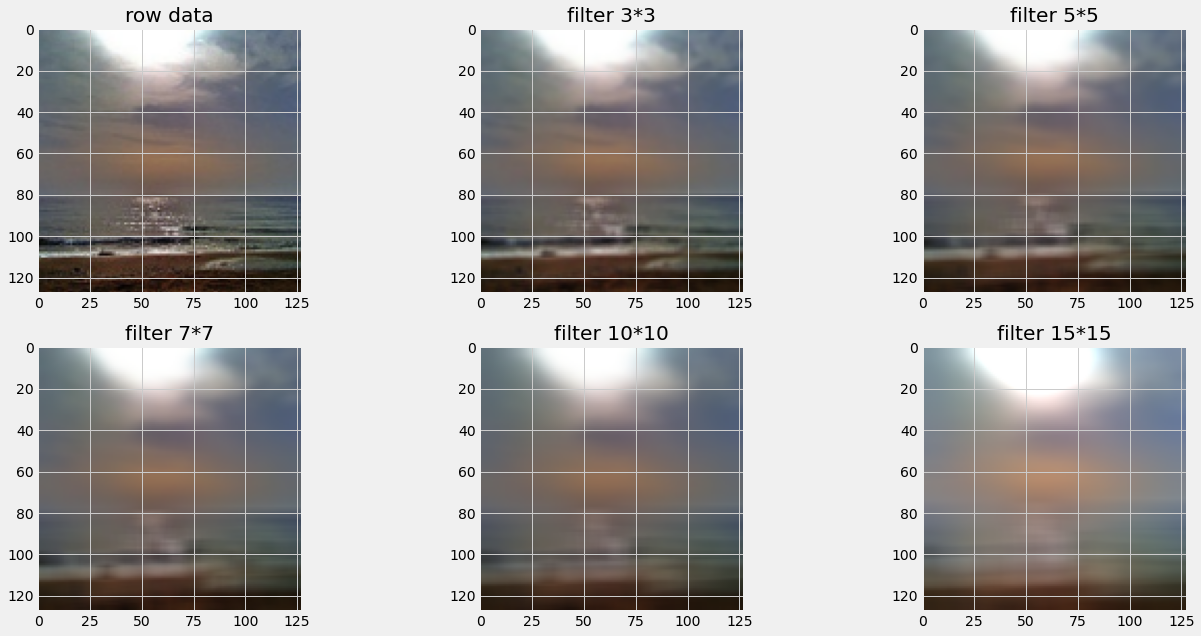

In [473]:
# The argument is data, filter size
sample_img = img_data[609]

fig, ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].imshow(sample_img)
ax[0,0].set_title("row data")

ax[0,1].imshow(cv2.filter2D(sample_img,-1,
                            np.ones((3,3),np.float32)/9))
ax[0,1].set_title("filter 3*3")
               
ax[0,2].imshow(cv2.filter2D(sample_img,-1,
                            np.ones((5,5),np.float32)/25))
ax[0,2].set_title("filter 5*5")
               
ax[1,0].imshow(cv2.filter2D(sample_img,-1,
                            np.ones((7,7),np.float32)/49))
ax[1,0].set_title("filter 7*7")
               
ax[1,1].imshow(cv2.filter2D(sample_img,-1,
                            np.ones((10,10),np.float32)/100))
ax[1,1].set_title("filter 10*10")
               
ax[1,2].imshow(cv2.filter2D(sample_img,-1,
                            np.ones((15,15),np.float32)/175))
ax[1,2].set_title("filter 15*15")

## GaussianBlur

This result is the result of filtering by the technique called GaussianBlur, but as the clouds in the distance are filtered, the shadows become sharp and look like mountains. It can be considered that such a feature is the reason for erroneous recognition.

Reference) https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1

Text(0.5, 1.0, 'filter 7*7, 1')

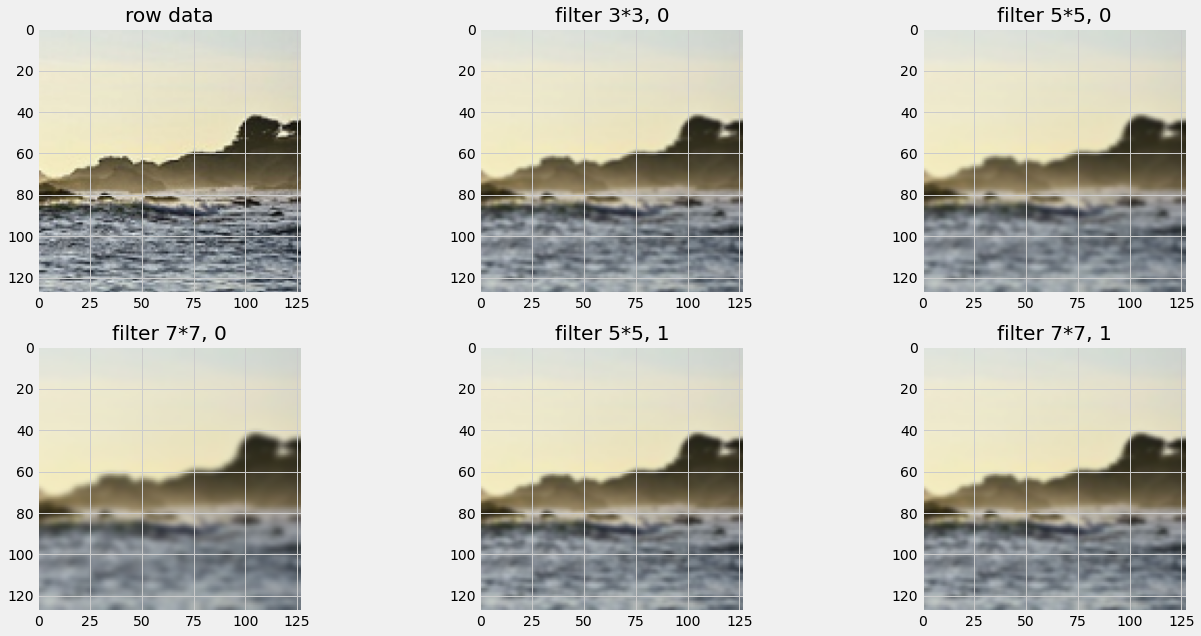

In [475]:
# The argument is data, filter size, stdv
sample_img = img_data[695]

fig, ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].imshow(sample_img)
ax[0,0].set_title("row data")

ax[0,1].imshow(cv2.GaussianBlur(sample_img,(3,3),0))
ax[0,1].set_title("filter 3*3, 0")
               
ax[0,2].imshow(cv2.GaussianBlur(sample_img,(5,5),0))
ax[0,2].set_title("filter 5*5, 0")
               
ax[1,0].imshow(cv2.GaussianBlur(sample_img,(7,7),0))
ax[1,0].set_title("filter 7*7, 0")
               
ax[1,1].imshow(cv2.GaussianBlur(sample_img,(5,5),1))
ax[1,1].set_title("filter 5*5, 1")
               
ax[1,2].imshow(cv2.GaussianBlur(sample_img,(7,7),1))
ax[1,2].set_title("filter 7*7, 1")

## Edge detection with Canny[](http://)

Finally, using the example of forest, let's check the extraction of feature lines using Canny. As we can see, the result is something to not understand. Although a straight image can be read, it is difficult to distinguish whether this is a straight line of another target building or road.

Reference) https://docs.opencv.org/master/da/d22/tutorial_py_canny.html

Text(0.5, 1.0, 'minVal:50, maxVal:200')

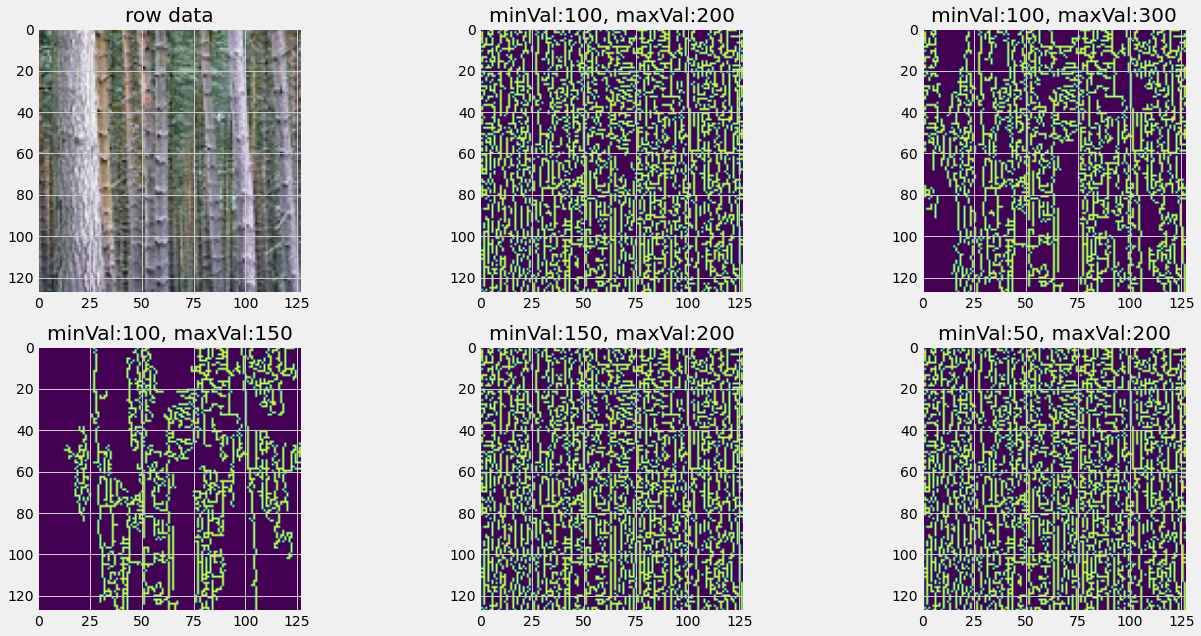

In [470]:
# The argument is data, minVal, maxVal
sample_img = img_data[1468]

fig, ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].imshow(sample_img)
ax[0,0].set_title("row data")

ax[0,1].imshow(cv2.Canny(sample_img, 100, 200))
ax[0,1].set_title("minVal:100, maxVal:200")
               
ax[0,2].imshow(cv2.Canny(sample_img, 100, 400))
ax[0,2].set_title("minVal:100, maxVal:300")
               
ax[1,0].imshow(cv2.Canny(sample_img, 100, 600))
ax[1,0].set_title("minVal:100, maxVal:150")
               
ax[1,1].imshow(cv2.Canny(sample_img, 50, 200))
ax[1,1].set_title("minVal:150, maxVal:200")
               
ax[1,2].imshow(cv2.Canny(sample_img, 10, 200))
ax[1,2].set_title("minVal:50, maxVal:200")

## Conclusion

### I tried to classify the image of the intel lmage using CNN. Which category does the result relatively often belong to? It turns out that can be predicted. On the other hand, the results were unpredictable for images in which feature lines were difficult to extract, images with too many feature lines, and images that were difficult to judge due to overlapping classification definitions. It was found that how to deal with these features, which are trade-offs in the CNN filtering process, is an important point for improving accuracy.

* Maybe my guess is wrong. Next, for deeper understanding, I would like to deepen my understanding by analyzing the results of the latest prediction methods such as EfficientNet and other themes.